# Introduction

Welcome to My Final DSCI 235 Project

I chose to observe collision data taken from the state of California. In this dataset is every single car collision from the year 2001 through 2020.
This dataset is suited for lots of small observations, rather than one large question to ask. In this project I gathered basic observational collision data to understand how 


### Main Questions:

- How is the time of the Week, Month, and Year correlated to traffic collisions
- How is alcohol correlated to traffic collisions and traffic fatalities
- How do Vehicles and Motorcycles compare in terms of collisions and fatalities?
- How did COVID correlate to Traffic Collisions?


In [24]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Read in CSV, and add custom columns

collisiondf = pd.read_csv("CondenseCSV.csv")
collisiondf["collision_date"] = pd.to_datetime(collisiondf["collision_date"]) # convert collision_date string to pandas date time
collisiondf["year"] = collisiondf["collision_date"].dt.year - 2000 # Years go from 0-20, not 2001-2020
collisiondf["month"] = collisiondf["collision_date"].dt.month # Create month column
collisiondf["week"] = collisiondf["collision_date"].dt.weekday # Create weekday column
collisiondf["alcohol_involved"] = collisiondf["alcohol_involved"].fillna(0) # Replace na values to 0 for easier use

Basic Data Visualization

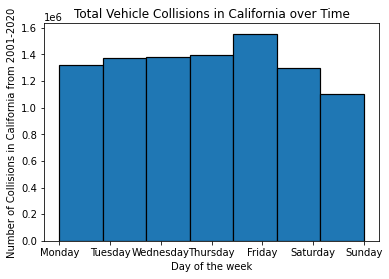

In [45]:
# Plot Collision Count by Week

plt.hist((collisiondf["week"]), edgecolor = "black", linewidth = 1.2,bins = 7)
plt.xticks(np.arange(7),(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']))
plt.ylabel("Number of Collisions in California from 2001-2020")
plt.xlabel("Day of the week")
plt.title("Total Vehicle Collisions in California over Time")
plt.show()

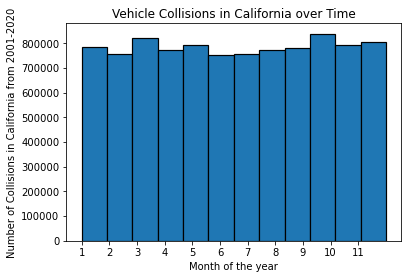

In [28]:
# Plot Collision Count by Month


plt.hist(collisiondf["month"], edgecolor = "black", linewidth = 1.2,bins = 12)
plt.xticks(np.arange(1,12))

plt.ylabel("Number of Collisions in California from 2001-2020")
plt.xlabel("Month of the year")
plt.title("Vehicle Collisions in California over Time")
plt.show()

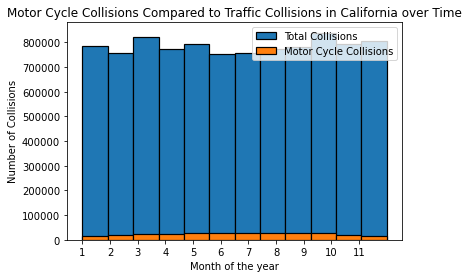

In [52]:
# Motorcycle Collision Count by Month compared to all vehicle collisions

MotorCycledf = collisiondf.loc[collisiondf['motorcycle_collision'] == 1] # Extract columns which involved a motorcycle
plt.hist(collisiondf["month"], edgecolor = "black", linewidth = 1.2,bins = 12)
plt.hist(MotorCycledf["month"], edgecolor = "black", linewidth = 1.2,bins = 12)

plt.xticks(np.arange(1,12))

plt.ylabel("Number of Collisions")
plt.xlabel("Month of the year")
plt.legend(["Total Collisions", "Motor Cycle Collisions"])
plt.title("Motor Cycle Collisions Compared to Traffic Collisions in California over Time")
plt.show()

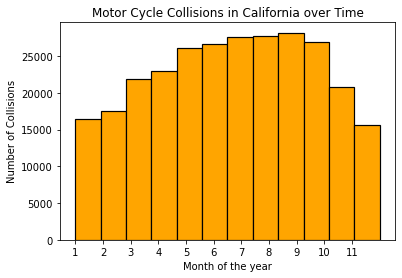

In [53]:
plt.hist(MotorCycledf["month"], edgecolor = "black", linewidth = 1.2,bins = 12, color = "orange")

plt.xticks(np.arange(1,12))

plt.ylabel("Number of Collisions")
plt.xlabel("Month of the year")
plt.title("Motor Cycle Collisions in California over Time")
plt.show()

Before running this plot, I would have thought that the sumer months (6,7,8) would be somewhat higher as tourism means there would be more cars on the road. However, this is not supported by the data. While Vehicle Collisions were mostly consistent, isolating for motorcycles paints a different story. There are significantly more motorcycle collisions, likely due to the fact that more people are riding their motorcycles in good weather.

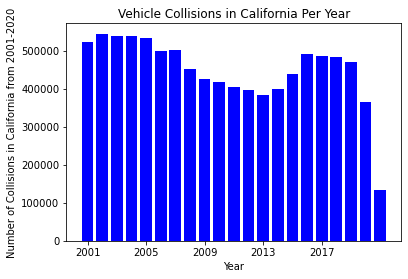

In [30]:
# Plot Collision Count by Year
averageCollisionsPerYear = collisiondf["year"].value_counts()

plt.bar(averageCollisionsPerYear.index + 2000,averageCollisionsPerYear, color = "blue",linewidth = 1.2)
plt.xticks(np.arange(2001, 2020, step = 4))

plt.ylabel("Number of Collisions in California from 2001-2020")
plt.xlabel("Year")
plt.title("Vehicle Collisions in California Per Year")
plt.show()

This Plot is intersting, especially with historical knowledge. From the years 2008 to 2013, traffic collisions were decreasing, which also coincides with the recession in America. I cannot say for sure that this there is a causal link between the two, but it was something I did not expect to be correlated. In 2019, collisions were down, so in a world without COVID, it would have been interesting to see if that trend would have naturally stayed the same. Importantly, this graph does not take into account the fact that the population of California has been growing, so even if the slope is flat, or slightly decreasing, the actual collisions per capita is going down.

We can also see what an impact COVID had, regarding traffic collisions. Collisions were drastically reduced, to almost more than half. 

# How does daylight Savings affect collisions?

In [31]:

numberOfDays = 7214 # Number of Days in the dataframe
numberOfCrashes = len(collisiondf)

averageCollisionsPerDay = numberOfCrashes / numberOfDays
averageCollisionsPerDay



multiIndexDateTime = collisiondf.set_index(['collision_date'])
collisionsAfterDayLightSavings = multiIndexDateTime.loc[slice("2001-04-01","2001-04-07")]


# Since Daylight savings is not consistent, I cannot run a for loop

collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2002-04-07","2002-04-14")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2003-04-06","2003-04-13")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2004-04-04","2004-04-11")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2005-04-03","2005-04-10")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2006-04-02","2006-04-09")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2007-03-11","2007-03-18")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2008-03-09","2008-03-16")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2009-03-14","2009-03-21")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2010-03-13","2010-03-20")]])

collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2011-03-12","2011-03-19")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2012-03-11","2012-03-18")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2013-03-10","2013-03-17")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2014-03-09","2014-03-16")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2015-03-08","2015-03-15")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2016-03-13","2016-03-20")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2017-03-12","2017-03-19")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2018-03-11","2018-03-18")]])
collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2019-03-10","2019-03-17")]])

collisionsAfterDayLightSavings = pd.concat([collisionsAfterDayLightSavings,multiIndexDateTime.loc[slice("2020-03-08","2020-03-15")]])


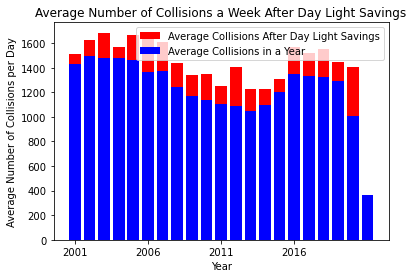

In [32]:
averageCollisionsAfterDayLightSavings = collisionsAfterDayLightSavings.groupby(['year']).size() / 7

# Get average number of collisions per year, for that year
averageCollisionsPerYear = collisiondf["year"].value_counts() / 365

# Plot data
plt.bar(averageCollisionsAfterDayLightSavings.index+2000, averageCollisionsAfterDayLightSavings, color = "red")
plt.bar(averageCollisionsPerYear.index + 2000,averageCollisionsPerYear, color = "blue")
plt.title("Average Number of Collisions a Week After Day Light Savings")

plt.xticks(np.arange(2001,2020,step = 5))
plt.xlabel("Year")
plt.ylabel("Average Number of Collisions per Day")
plt.legend(["Average Collisions After Day Light Savings", "Average Collisions in a Year"])


This graph is a graph of average number of collisions per day, for each year.

We see that the week after daylight savings does have an affect on the average number of collisions, and more than I would have expected, especially for years 2012 and 2019.

# Drunk Driving

Growing up, I have always been told not to drink and drive, and now, there are services like Uber of Lyft. I would expect that drinking and driving has decreased over time.

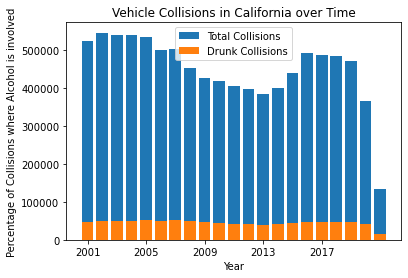

In [33]:
alcoholValueCounts = collisiondf['year'].loc[collisiondf['alcohol_involved'] == 1].value_counts()


plt.bar(collisiondf["year"].value_counts().index + 2000,collisiondf["year"].value_counts())
plt.bar(alcoholValueCounts.index + 2000,alcoholValueCounts)
plt.xticks(np.arange(2001, 2020, step = 4))

plt.ylabel("Percentage of Collisions where Alcohol is involved")
plt.xlabel("Year")
plt.title("Vehicle Collisions in California over Time")
plt.legend(['Total Collisions', 'Drunk Collisions'])
plt.show()

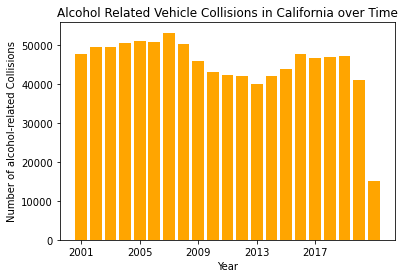

In [34]:
plt.bar(alcoholValueCounts.index + 2000,alcoholValueCounts, color = 'orange')
plt.xticks(np.arange(2001, 2020, step = 4))

plt.ylabel("Number of alcohol-related Collisions")
plt.xlabel("Year")
plt.title("Alcohol Related Vehicle Collisions in California over Time")
plt.show()

In [35]:
CaliforniaPopulationdf = pd.read_csv("CAPOP.csv")

# CSV accounted population by 100,000, so to get accurate data, I must revert back by applying the population by 100,000
CaliforniaPopulationdf["CAPOP"] = CaliforniaPopulationdf["CAPOP"] * 100000


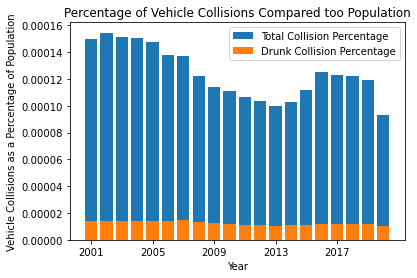

In [36]:
alcoholValueCountsNormalized = collisiondf['year'].loc[collisiondf['alcohol_involved'] == 1].value_counts().sort_index() / CaliforniaPopulationdf["CAPOP"]

collisionValueCountsNormalized = collisiondf["year"].value_counts().sort_index() / CaliforniaPopulationdf["CAPOP"]



plt.bar(np.arange(2001,2021),collisionValueCountsNormalized.iloc[1:-1])
plt.bar(np.arange(2001,2021),alcoholValueCountsNormalized.iloc[1:-1])
plt.xticks(np.arange(2001, 2020, step = 4))
plt.ylabel("Vehicle Collisions as a Percentage of Population")
plt.xlabel("Year")
plt.title("Percentage of Vehicle Collisions Compared too Population")
plt.legend(['Total Collision Percentage', 'Drunk Collision Percentage'])
plt.show()

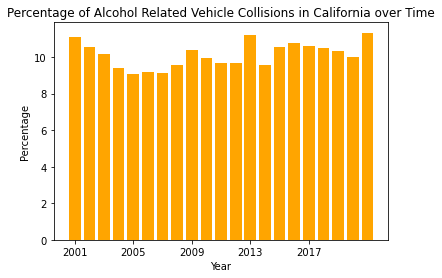

In [37]:
percentageValue = alcoholValueCounts.divide(collisiondf["year"].value_counts()) * 100


plt.bar(alcoholValueCounts.index + 2000,percentageValue, color = 'orange')
plt.xticks(np.arange(2001, 2020, step = 4))

plt.ylabel("Percentage")
plt.xlabel("Year")
plt.title("Percentage of Alcohol Related Vehicle Collisions in California over Time")
plt.show()



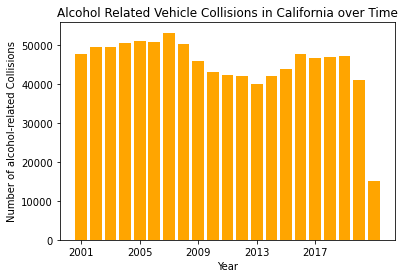

In [38]:
plt.bar(alcoholValueCounts.index + 2000,alcoholValueCounts, color = 'orange')
plt.xticks(np.arange(2001, 2020, step = 4))

plt.ylabel("Number of alcohol-related Collisions")
plt.xlabel("Year")
plt.title("Alcohol Related Vehicle Collisions in California over Time")
plt.show()


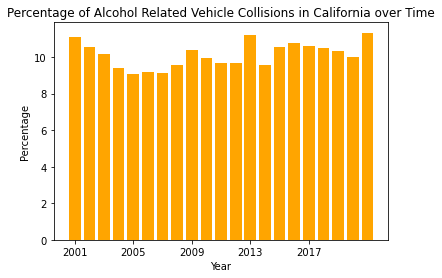

In [39]:
percentageValue = alcoholValueCounts.divide(collisiondf["year"].value_counts()) * 100


plt.bar(alcoholValueCounts.index + 2000,percentageValue, color = 'orange')
plt.xticks(np.arange(2001, 2020, step = 4))

plt.ylabel("Percentage")
plt.xlabel("Year")
plt.title("Percentage of Alcohol Related Vehicle Collisions in California over Time")
plt.show()

It seems like alcohol related crashes are more correlated to crashes in a given year, than time. It does not appear as though the number of alcohol-related collisions have decreased, especially when accounting for total number of collisions.

# The Correlation between Covid and Traffic Collisions

It seems that Covid has had the greatest impact on traffic collisions. I want to know if traffic collisions are more deadly after the stay at home orders because there would be less people on the road. It seems like people drive faster when there are less people on the road, and speed is correlated with death.

In [40]:
collisionsAfterCovid = collisiondf.loc[collisiondf['month'] >= 3]

covidKilleddf = collisionsAfterCovid.loc[collisionsAfterCovid['killed_victims'] >= 1]
CovidCollisionCounts = collisionsAfterCovid.groupby(collisionsAfterCovid['month']).size()
covidKilleddfCounts = covidKilleddf.groupby(covidKilleddf['month']).size()
PercentageOfKilledCovid = covidKilleddfCounts.divide(CovidCollisionCounts) * 100


In [41]:
df2019 = collisiondf.loc[collisiondf['year'] == 19]
df2019Deaths = df2019.loc[df2019['killed_victims'] >= 1]

Collision2019Counts = df2019.groupby(df2019['month']).size()
df2019DeathCounts = df2019Deaths.groupby(df2019Deaths['month']).size()

df2019DeathPercentage = df2019DeathCounts.divide(Collision2019Counts)* 100

Text(0.5, 1.0, 'Percentage of Collisions that Result in Death')

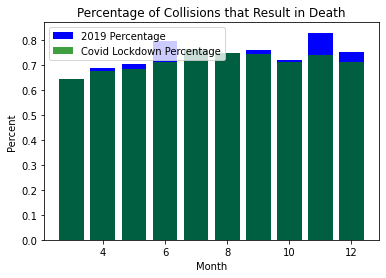

In [42]:
covidKilleddfCounts

plt.bar(np.arange(3,13),df2019DeathPercentage[2:12], alpha = 1, color = "blue")
plt.bar(np.arange(3,13), PercentageOfKilledCovid, color = "green", alpha = .75)

plt.ylabel("Percent")
plt.xlabel("Month")
plt.legend(['2019 Percentage','Covid Lockdown Percentage'])
plt.title("Percentage of Collisions that Result in Death")

# Comparing Motorcycle Death Percentage to Vehicle Death Percentage by Year

In [43]:
motorCyclesKilled = collisiondf.loc[collisiondf['motorcyclist_killed_count'] >= 1]

noMotorCycle = collisiondf.loc[(collisiondf['motorcycle_collision'] == 0) & (collisiondf['killed_victims'] >= 1)]


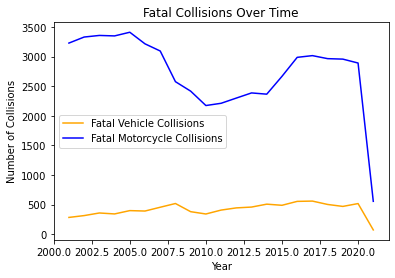

In [44]:
plt.plot(np.arange(2001, 2022, dtype = int), motorCyclesKilled['year'].value_counts().sort_index(), color = 'orange')
plt.plot(np.arange(2001, 2022, dtype = int), noMotorCycle['year'].value_counts().sort_index(), color = 'blue')
plt.ylabel("Number of Collisions")
plt.xlabel("Year")
plt.title("Fatal Collisions Over Time")
plt.legend(['Fatal Vehicle Collisions', 'Fatal Motorcycle Collisions'])
plt.show()

We can see that even though there are less motorcycle crashes compared to vehicle crashes, they have a higher mortality rate. That means that if you are in a vehicle collision, the chances of dying while riding a motorcycle is significantly higher than driving a car.